In [22]:
'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
E = 1 #Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)# 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, 199, 175]

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = ne[:, 190, 175]# 只在选定 y 区域和整个 z 上求和

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [50,  2,  2]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Ion_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_ele_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_positron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Number_Density_Ion_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Der

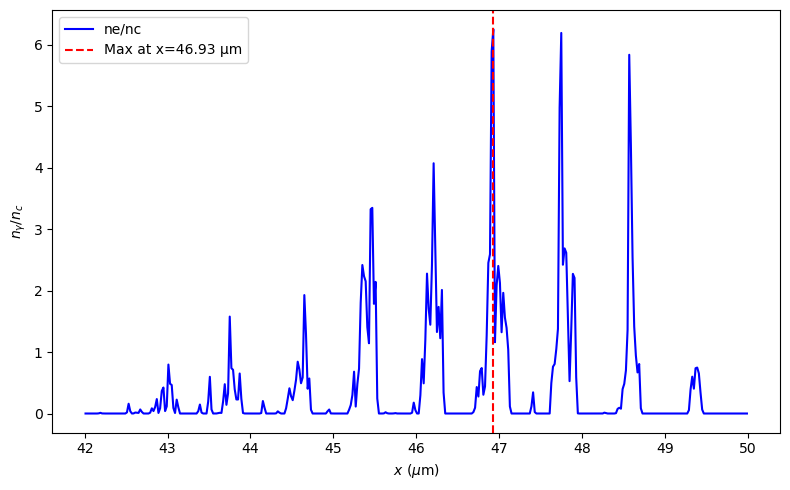

最大值 ne/nc = 6.256e+00，对应 x = 46.930 μm


In [23]:
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = (42.0, 50.0)  # 设定 x 区间（单位：μm）
x_mask = (x_values >= x_min) & (x_values <= x_max)

x_values_limited = x_values[x_mask]
ne_limited = ne_sum_partial_y[x_mask]

# 获取最大值及其位置
max_ne = ne_limited.max()
max_index = np.argmax(ne_limited)
max_x = x_values_limited[max_index]

# ---- 绘图 ----
plt.figure(figsize=(8, 5))
plt.plot(x_values_limited, ne_limited, color='blue', label='ne/nc')
plt.axvline(max_x, color='red', linestyle='--', label=f'Max at x={max_x:.2f} μm')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'${n_\gamma}/{n_c}$')

# # 设置 y 轴为科学记数法
# ax = plt.gca()
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend()
plt.tight_layout()
plt.show()

# 打印最大值及其位置
print(f"最大值 ne/nc = {max_ne:.3e}，对应 x = {max_x:.3f} μm")
